In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import tensorflow
from tensorflow import keras

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.shape

(284807, 31)

In [5]:
print(tensorflow.__version__)

2.5.0


In [6]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [11]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

## As we can see that the dataset is highly imbalanced 

In [15]:
non_fraud=df[df['Class']==0]
fraud=df[df['Class']==1]

In [17]:
non_fraud.shape,fraud.shape

((284315, 31), (492, 31))

In [18]:
non_fraud=non_fraud.sample(fraud.shape[0])
non_fraud.shape,fraud.shape

((492, 31), (492, 31))

In [20]:
data=fraud.append(non_fraud,ignore_index=True)
data['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

In [21]:
x=data.drop('Class',axis=1)
y=data['Class']

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=0)

In [23]:
x_train.shape,x_test.shape

((787, 30), (197, 30))

In [24]:
scaler=StandardScaler()

In [25]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [26]:
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()

In [27]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

## Building the model

In [32]:
model=keras.Sequential()

model.add(keras.layers.Conv1D(32,2,activation='relu',input_shape=x_train[0].shape))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Conv1D(64,2,activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(1,activation='sigmoid'))

In [33]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 29, 32)            96        
_________________________________________________________________
batch_normalization_2 (Batch (None, 29, 32)            128       
_________________________________________________________________
dropout_2 (Dropout)          (None, 29, 32)            0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 28, 64)            4160      
_________________________________________________________________
batch_normalization_3 (Batch (None, 28, 64)            256       
_________________________________________________________________
dropout_3 (Dropout)          (None, 28, 64)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1792)             

In [34]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [35]:
model_history=model.fit(x_train,y_train,epochs=30,validation_data=(x_test,y_test),verbose=1)

Epoch 1/30
25/25 [==============================] - 3s 26ms/step - loss: 0.6020 - accuracy: 0.8272 - val_loss: 0.5162 - val_accuracy: 0.6751
Epoch 2/30
25/25 [==============================] - 0s 10ms/step - loss: 0.2242 - accuracy: 0.9276 - val_loss: 0.5386 - val_accuracy: 0.5279
Epoch 3/30
25/25 [==============================] - 0s 8ms/step - loss: 0.2006 - accuracy: 0.9276 - val_loss: 0.5966 - val_accuracy: 0.5127
Epoch 4/30
25/25 [==============================] - 0s 8ms/step - loss: 0.1522 - accuracy: 0.9492 - val_loss: 0.5295 - val_accuracy: 0.5533
Epoch 5/30
25/25 [==============================] - 0s 8ms/step - loss: 0.1547 - accuracy: 0.9492 - val_loss: 0.7214 - val_accuracy: 0.5127
Epoch 6/30
25/25 [==============================] - 0s 8ms/step - loss: 0.1613 - accuracy: 0.9504 - val_loss: 0.5894 - val_accuracy: 0.5431
Epoch 7/30
25/25 [==============================] - 0s 8ms/step - loss: 0.1444 - accuracy: 0.9492 - val_loss: 0.5077 - val_accuracy: 0.5939
Epoch 8/30
25/25 [

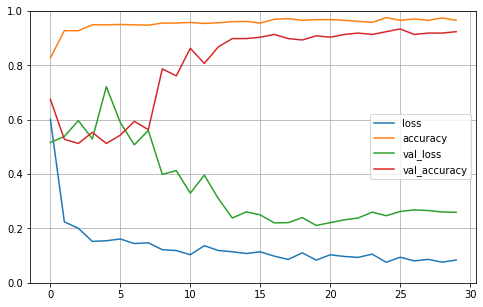

In [36]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [37]:
## Adding Pooling layer

In [38]:
model1=keras.Sequential()

model1.add(keras.layers.Conv1D(32,2,activation='relu',input_shape=x_train[0].shape))
model1.add(keras.layers.BatchNormalization())
model1.add(keras.layers.MaxPool1D(2))
model1.add(keras.layers.Dropout(0.2))

model1.add(keras.layers.Conv1D(64,2,activation='relu'))
model1.add(keras.layers.BatchNormalization())
model1.add(keras.layers.MaxPool1D(2))
model1.add(keras.layers.Dropout(0.5))

model1.add(keras.layers.Flatten())
model1.add(keras.layers.Dense(64,activation='relu'))
model1.add(keras.layers.Dropout(0.5))

model1.add(keras.layers.Dense(1,activation='sigmoid'))

In [39]:
model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [40]:
model1_history=model1.fit(x_train,y_train,epochs=50,validation_data=(x_test,y_test),verbose=1)

Epoch 1/50
25/25 [==============================] - 2s 24ms/step - loss: 0.6121 - accuracy: 0.7598 - val_loss: 0.5523 - val_accuracy: 0.8274
Epoch 2/50
25/25 [==============================] - 0s 7ms/step - loss: 0.3388 - accuracy: 0.8780 - val_loss: 0.5218 - val_accuracy: 0.8426
Epoch 3/50
25/25 [==============================] - 0s 7ms/step - loss: 0.2918 - accuracy: 0.8895 - val_loss: 0.4876 - val_accuracy: 0.8680
Epoch 4/50
25/25 [==============================] - 0s 7ms/step - loss: 0.2478 - accuracy: 0.8996 - val_loss: 0.4466 - val_accuracy: 0.8985
Epoch 5/50
25/25 [==============================] - 0s 7ms/step - loss: 0.2290 - accuracy: 0.9161 - val_loss: 0.4139 - val_accuracy: 0.8934
Epoch 6/50
25/25 [==============================] - 0s 8ms/step - loss: 0.2085 - accuracy: 0.9327 - val_loss: 0.3776 - val_accuracy: 0.8934
Epoch 7/50
25/25 [==============================] - 0s 7ms/step - loss: 0.2167 - accuracy: 0.9149 - val_loss: 0.3361 - val_accuracy: 0.8985
Epoch 8/50
25/25 [=

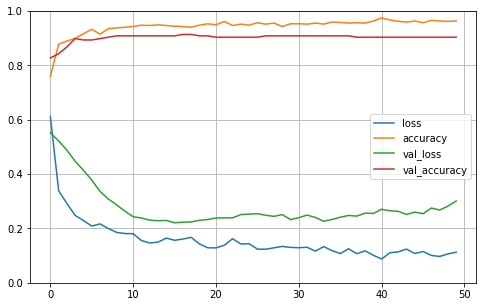

In [41]:
pd.DataFrame(model1_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [42]:
## it can be observed that both the loss and accuracy reach saturation and do not get altered anymore
## Although it can be noted that because it is a small dataset, the pooling layer loose much of the information 